# SWAP test

This is a sample code to perform a SWAP test using qiskit.

|\phi> = |0>
|\psi> = ry(theta)|0>

The SWAP test returns always 0 if theta = 0, 2pi, 4pi, ...
The measurement outcome becomes 50:50 if theta = pi, 3pi, 5pi, ...

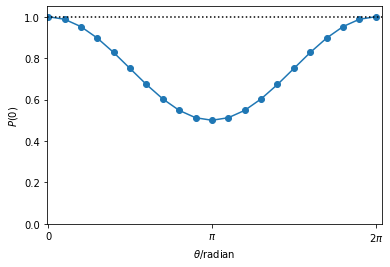

In [6]:
from qiskit import QuantumCircuit, execute, Aer
import matplotlib.pyplot as plt
from numpy import dot, conjugate
from math import pi

simulator = Aer.get_backend('statevector_simulator')

# Discretization of the adiabatic evolution
num_steps = 21
thetas = []
prob_zero = []

for i in range(num_steps):
    theta = i*pi/(0.5*(num_steps-1))
    circuit = QuantumCircuit(3)
    # Generate psi 
    circuit.ry(theta, 2)
    # SWAP test
    circuit.h(0)
    circuit.cswap(0, 1, 2)
    circuit.h(0)
    job = execute(circuit, simulator)
    ket = job.result().get_statevector()
    thetas.append(theta)
    prob_000 = dot(ket[0], conjugate(ket[0])).real
    prob_001 = dot(ket[1], conjugate(ket[1])).real
    prob_010 = dot(ket[2], conjugate(ket[2])).real
    prob_011 = dot(ket[3], conjugate(ket[3])).real
    prob_zero.append(prob_000 + prob_001 + prob_010 + prob_011)

# Visualization of numerical quantum circuit simulation results 

fig = plt.figure()
plt.plot(thetas, prob_zero, marker='o')
plt.plot([-0.02, 6.4], [1, 1], marker='None', color='black', linestyle=':')
plt.xlim(-0.02, 6.4)
plt.ylim(0, 1.05)
plt.xticks([0, pi, 2*pi], ['0', '$\pi$', '$2\pi$'])
plt.ylabel('$P(0)$')
plt.xlabel('$\\theta\mathrm{/radian}$')
plt.show()
